## Out-of Sample Game, Out of Sample Context

Here is the analysis code for Public Pool Game (PGG). This game is structurally different from the other 4 games (in-sample games), and the context is also different from 5 in-sample and 3 out-of-sample contexts.

The game structure is this:



In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import re
import os

from PIL import Image


# Sample data dictionary (replace this with your actual data)

llm = '7b'

data = pickle.load(open(os.path.join("../pgg/", llm+"-results-pgg.txt"), "rb" ))

# data type
print(type(data))

# data info
print(data.keys())

print(len(data['poolparty']))

<class 'dict'>
dict_keys(['poolparty'])
600


In [11]:
# check for invalid values
for key in data.keys():
    for item in data[key]:
        # if item != '  C' and item != '  D':
            print(key, item)

poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate 7 dollars to the party fund.
poolparty   I choose to donate 7 dollars to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate 7 dollars to the party fund.
poolparty   I choose to donate 7 dollars to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choose to donate $7 to the party fund.
poolparty   I choo

In [12]:
def get_amount_from_text(text):
    return int(re.search(r'\d+', text).group())

def remove_odd_index_values(data):
    # remove odd index values and only keep even index values
    for key in data.keys():
        data[key] = data[key][::2]
    return data

key = 'poolparty'
numeric_data = {}
numeric_data[key] = []
for item in data[key]:
    numeric_data[key].append(get_amount_from_text(item))
        
numeric_data = remove_odd_index_values(numeric_data)


{5: 226, 7: 74}


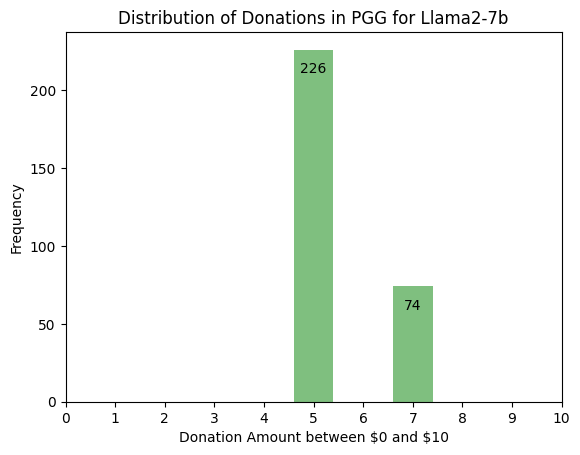

LLM 7b - poolparty
Average donation:  5.493333333333333
[5, 5, 5, 5, 5, 5, 5, 7, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 5, 7, 7, 5, 5, 5, 7, 7, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 7, 5, 5, 7, 7, 7, 7, 5, 7, 7, 5, 5, 7, 5, 5, 5, 5, 7, 7, 5, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 7, 7, 7, 5, 5, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 7, 7, 5, 5, 5, 7, 5, 7, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 7, 7, 7, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 7, 5, 5, 7, 7, 5, 7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 7, 5, 5, 5, 5]
Standard deviation:  0.8621420352174513


In [13]:
def get_the_distribution_of_a_list(list):
    distribution = {}
    for item in list:
        if item in distribution:
            distribution[item] += 1
        else:
            distribution[item] = 1
    return distribution

def plot_the_distribution(distribution):
    print(distribution)
    # make xsticks only integers between 0 and 10
    
    # create a bar chart with xticks from 0 to 10
    plt.bar(distribution.keys(), distribution.values(), color='g', alpha=0.5)
    plt.xticks(np.arange(0, 11, 1.0))
    
    # write the y value on top of the bar
    for key, value in distribution.items():
        plt.text(key, value-15, str(value), ha='center')
    
    plt.title('Distribution of Donations in PGG for Llama2-'+llm)
    plt.xlabel('Donation Amount between \$0 and \$10')
    plt.ylabel('Frequency')
    plt.savefig(os.path.join("../pgg_figs/", llm+"-results-pgg.png"))
    plt.show()
        
donation_distribution = get_the_distribution_of_a_list(numeric_data[key])
plot_the_distribution(donation_distribution)

# print average donation
print(f'LLM {llm} - {key}')
print("Average donation: ", sum(numeric_data[key])/len(numeric_data[key]))
print(numeric_data[key])
print("Standard deviation: ", np.std(numeric_data[key]))

In [4]:
# merge three figs in /pgg_figs/ into one
# open the three images

images = []
llms = ['7b', '7bF', '70b']
for llm in llms:
    images.append(Image.open(os.path.join("../pgg_figs/", llm+"-results-pgg.png")))

# merge all three images horizentally into one image and call it "merged.png"
merged = Image.new("RGB", (images[0].width * 3, images[0].height))
x_offset = 0
for img in images:
    merged.paste(img, (x_offset, 0))
    x_offset += img.width
    
merged.save(os.path.join("../pgg_figs/", llm+"-results-pgg-merged.png"))

In [14]:
# calculate the variance
def calculate_variance(data):
    mean = sum(data)/len(data)
    variance = 0
    for item in data:
        variance += (item - mean)**2
    return variance/len(data)

print("Variance: ", calculate_variance(numeric_data[key]))
print("Standard Deviation: ", np.sqrt(calculate_variance(numeric_data[key])))

Variance:  0.7432888888888856
Standard Deviation:  0.8621420352174493


## All in one plot

In [7]:
final_data = {'7b': {"average": 5.49, "std": 0.86}, '7b-finetuned': {"average": 5.92, "std": 0.99}, '70b': {"average": 7, "std": 0.0}}

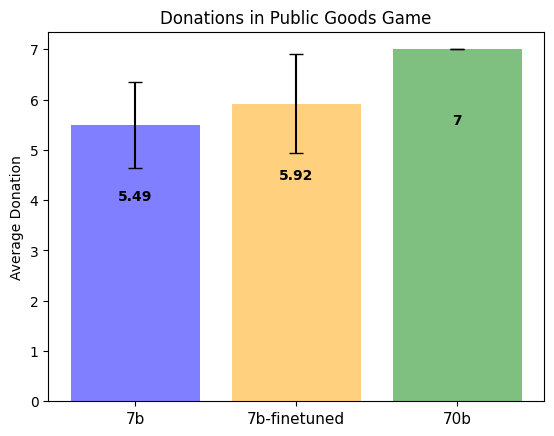

In [10]:
# draw a bar chart for the final data
# x sticks are the keys of the final data
# y values are the average values of the final data
# error bars are the standard deviation of the final data
plt.figure()
x = [0, 1, 2]
y = [final_data['7b']['average'], final_data['7b-finetuned']['average'], final_data['70b']['average']]
errors = [final_data['7b']['std'], final_data['7b-finetuned']['std'], final_data['70b']['std']]
# set color to the bars
# show the value of each bar on top of the bar
for i, v in enumerate(y):
    plt.text(i, v -1.5, str(v), ha='center', fontsize=10, color='black', fontweight='bold')
plt.bar(x, y, yerr=errors, capsize=5, color=['blue', 'orange', 'green'], alpha=0.5)
# set the x stick size to 12
plt.xticks(x, ['7b', '7b-finetuned', '70b'], fontsize=11)
plt.ylabel('Average Donation', fontsize=10)
plt.title('Donations in Public Goods Game')
plt.savefig(os.path.join("../pgg_figs", "avg_donation.png"), dpi=600, bbox_inches='tight')
plt.show()

In [13]:
# now that we have average and std, do the t-test to see if the 7bF is significantly different from 7b
# compare final_data['7b'] and final_data['7b-finetuned'] using t-test
from scipy import stats
t_stat, p_value = stats.ttest_ind_from_stats(
    mean1=final_data['7b']['average'], std1=final_data['7b']['std'], nobs1=len(data['poolparty'])//2,
    mean2=final_data['7b-finetuned']['average'], std2=final_data['7b-finetuned']['std'], nobs2=len(data['poolparty'])//2
)
print(f'T-test between 7b and 7b-finetuned: t-statistic = {t_stat}, p-value = {p_value}')
# check if the p-value is less than 0.05
if p_value < 0.05:
    print('The difference between 7b and 7b-finetuned is statistically significant.')
else:
    print('The difference between 7b and 7b-finetuned is not statistically significant.')

    

T-test between 7b and 7b-finetuned: t-statistic = -5.679403664230581, p-value = 2.1110516008599744e-08
The difference between 7b and 7b-finetuned is statistically significant.


In [14]:
# # compare final_data['7b-finetuned'] and final_data['70b'] using t-test
t_stat, p_value = stats.ttest_ind_from_stats(
    mean1=final_data['7b-finetuned']['average'], std1=final_data['7b-finetuned']['std'], nobs1=len(data['poolparty'])//2,
    mean2=final_data['70b']['average'], std2=final_data['70b']['std'], nobs2=len(data['poolparty'])//2
)
print(f'T-test between 7b-finetuned and 70b: t-statistic = {t_stat}, p-value = {p_value}')


T-test between 7b-finetuned and 70b: t-statistic = -18.89509971893321, p-value = 8.61264826776819e-63
